<a href="https://colab.research.google.com/github/Bohdan-Salamakha/study/blob/master/anu/data_science/Customer_Churn_Analysis_and_Prediction_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse the dataset and determine if there are any data quality issues to address before processing.

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

# Link to the raw CSV file
file_url = 'https://raw.githubusercontent.com/Bohdan-Salamakha/study/refs/heads/master/anu/data_science/Churn.csv'

# Loading a file into a DataFrame
data = pd.read_csv(file_url)

In [106]:
# Checking the first rows of data
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [107]:
# 1. Check for missing values
missing_values = data.isnull().sum()
print("Number of missing values ​​in each column:")
print(missing_values)

Number of missing values ​​in each column:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [108]:
# 2. Checking the data types of each column
data_types = data.dtypes
print("\nData types of each column:")
print(data_types)


Data types of each column:
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [109]:
#3. Checking for unique values ​​in categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
unique_values = {col: data[col].unique() for col in categorical_columns}
print("\nUnique values ​​in categorical columns:")
for col, values in unique_values.items():
    print(f"{col}: {values}")


Unique values ​​in categorical columns:
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [110]:
#4 Checking Numeric Columns for Outliers
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
numerical_summary = data[numerical_columns].describe()
print("\nNumeric column statistics:")
print(numerical_summary)


Numeric column statistics:
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


# Data preprocessing

In [111]:
# 1. Convert 'TotalCharges' to a numeric type and handle invalid values
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')


In [112]:
# 2. Fill in the missing values ​​in 'TotalCharges' with zeros, assuming that these are new customers with zero tenure
data['TotalCharges'].fillna(0, inplace=True)


In [113]:
#3. Rechecking for missing values ​​after preprocessing
missing_values_after_cleaning = data.isnull().sum()
print("\nNumber of missing values ​​after cleaning:")
print(missing_values_after_cleaning)


Number of missing values ​​after cleaning:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# Using descriptive statistics, create the profile of an average customer who is likely to stay with the company and the average profile of the customer who is likely to churn. What characteristics or features (is it tenure, contract, streaming etc.) best distinguish these different classes of customers?

In [114]:
# We divide the data into two groups: clients who left and those who stayed
churned_customers = data[data['Churn'] == 'Yes']
retained_customers = data[data['Churn'] == 'No']

# Calculate average values ​​for numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
churned_stats = churned_customers[numerical_features].mean()
retained_stats = retained_customers[numerical_features].mean()

print("Average values ​​of numeric features for customers who left:")
print(churned_stats)
print("\nAverage values ​​of numeric features for customers who stayed:")
print(retained_stats)

Average values ​​of numeric features for customers who left:
tenure              17.979133
MonthlyCharges      74.441332
TotalCharges      1531.796094
dtype: float64

Average values ​​of numeric features for customers who stayed:
tenure              37.569965
MonthlyCharges      61.265124
TotalCharges      2549.911442
dtype: float64


In [115]:
# We determine the most frequent values ​​for categorical features
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod']

churned_categorical_distribution = churned_customers[categorical_features].mode().iloc[0]
retained_categorical_distribution = retained_customers[categorical_features].mode().iloc[0]

print("\nMost frequent categorical feature values ​​for customers who left:")
print(churned_categorical_distribution)
print("\nMost frequent categorical feature values ​​for customers who stayed:")
print(retained_categorical_distribution)


Most frequent categorical feature values ​​for customers who left:
gender                        Female
SeniorCitizen                      0
Partner                           No
Dependents                        No
PhoneService                     Yes
MultipleLines                    Yes
InternetService          Fiber optic
OnlineSecurity                    No
OnlineBackup                      No
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
Name: 0, dtype: object

Most frequent categorical feature values ​​for customers who stayed:
gender                        Male
SeniorCitizen                    0
Partner                        Yes
Dependents                      No
PhoneService                   Yes
MultipleLines                   No
InternetService                DSL
On

In [116]:
# We combine the results in one place for visual comparison
churn_profile = pd.concat([churned_stats, churned_categorical_distribution], axis=0)
retained_profile = pd.concat([retained_stats, retained_categorical_distribution], axis=0)

print("\nProfile of the average customer who left:")
print(churn_profile)

print("\nProfile of the average customer who stayed:")
print(retained_profile)


Profile of the average customer who left:
tenure                     17.979133
MonthlyCharges             74.441332
TotalCharges             1531.796094
gender                        Female
SeniorCitizen                      0
Partner                           No
Dependents                        No
PhoneService                     Yes
MultipleLines                    Yes
InternetService          Fiber optic
OnlineSecurity                    No
OnlineBackup                      No
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
dtype: object

Profile of the average customer who stayed:
tenure                   37.569965
MonthlyCharges           61.265124
TotalCharges           2549.911442
gender                        Male
SeniorCitizen                    0
Partner             

1. Tenure:

  Changed customers: Average tenure is significantly lower (around 18 months).

  Retained customers: Average tenure is significantly higher (around 38 months).

  Conclusion: Longer tenure is associated with a higher likelihood of customer retention. New customers have a higher risk of churn.
---
2. Payment Method:

  Changed customers: More likely to use "Electronic check" to pay.

  Retained customers: More likely to use "Mailed check" or automatic payments (bank transfer, credit card).

  Conclusion: Payment method may also be an indicator of customer loyalty. Perhaps customers with automatic payments are less likely to churn.
---
3. Internet Service:

  Changed customers: More likely to have "Fiber optic".

  Retained customers: More likely to have "DSL".

  Conclusion: Customers with more expensive internet services, such as "Fiber optic", are more likely to churn.
---
4. Additional services (OnlineSecurity, OnlineBackup, TechSupport, etc.):

  Changed customers: Usually do not have additional services connected (such as "OnlineSecurity", "TechSupport").

  Remaining customers: More likely, they have connected additional services.

  Conclusion: Customers who use additional services are more loyal and are more likely to stay with the company.

# Perform customer clustering, clusters labeling and clusters visualization.

In [117]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

In [118]:
# Step 1: Selecting Numerical Features for Clustering
clustering_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [119]:
# Step 2: Scaling the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[clustering_features])

Optimal number of clusters: 2


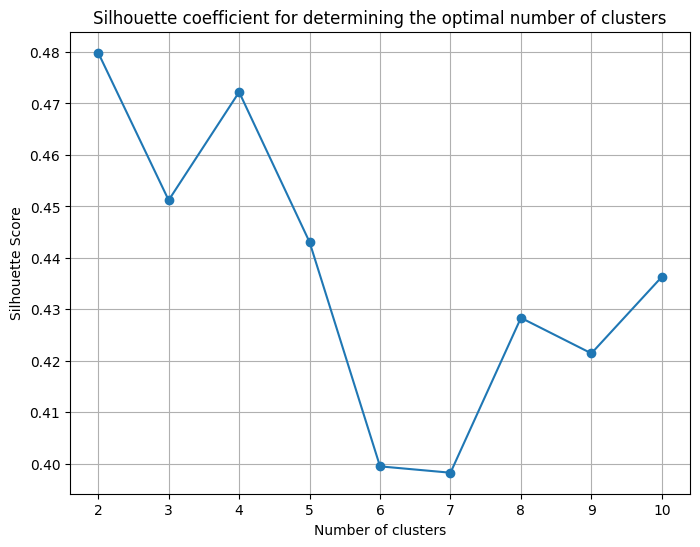

In [120]:
# Step 3: Determining the optimal number of clusters using the silhouette coefficient
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Finding the optimal number of clusters (maximum value of the silhouette coefficient)
optimal_clusters = k_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_clusters}")

# Visualization of the silhouette coefficient for different values ​​of k
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette coefficient for determining the optimal number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [121]:
# Step 4: Perform clustering with the found optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

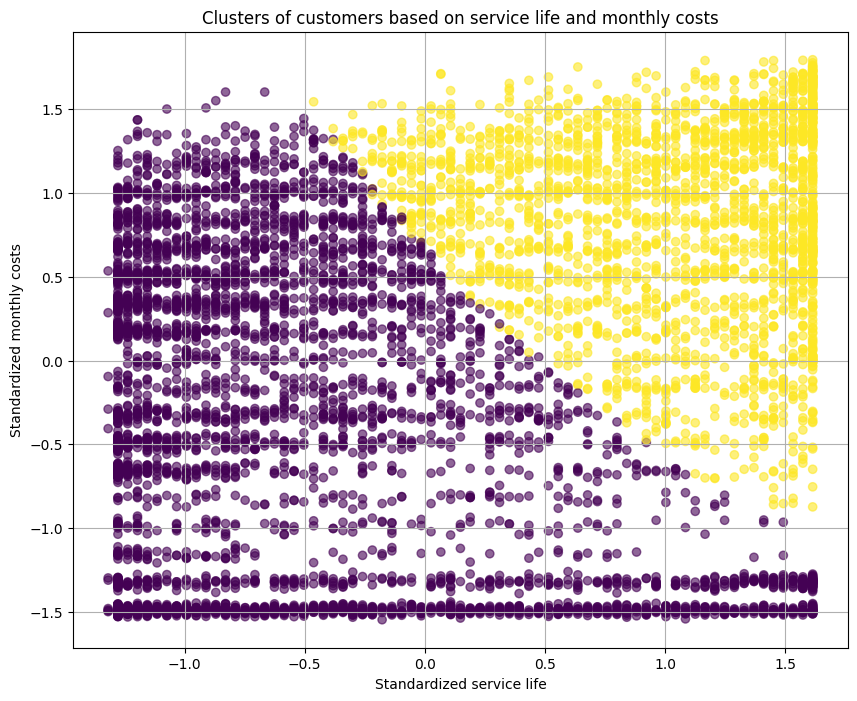

In [122]:
# Step 5: Visualizing clusters (using the first two features for a 2D plot)
plt.figure(figsize=(10, 8))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=data['Cluster'], cmap='viridis', alpha=0.6)
plt.title('Clusters of customers based on service life and monthly costs')
plt.xlabel('Standardized service life')
plt.ylabel('Standardized monthly costs')
plt.grid(True)
plt.show()

# Develop a classification models using any tool of your choice (R, Python, etc.) to fit a Decision Trees and Random Forest model to predict churn.

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [124]:
# Step 1: Preparing the data

# Selecting the target variable and features
X = data.drop(['Churn', 'Cluster'], axis=1)
y = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# We define numerical and categorical features
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = [col for col in X.columns if col not in numeric_features]

# Create a column transformer for data processing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# We divide the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [125]:
# Step 2: Train the models

# Model 1: Decision tree
decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Train the model
decision_tree_pipeline.fit(X_train, y_train)

# Model 2: Random Forest
random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
random_forest_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat', OneHotEncoder(),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [126]:
# Step 3: Evaluate Models

# Predictions for Decision Tree
y_pred_tree = decision_tree_pipeline.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy of decision tree model: {accuracy_tree:.2f}")
print("\nClassification report for decision tree model:")
print(classification_report(y_test, y_pred_tree))

# Predictions for random forest
y_pred_forest = random_forest_pipeline.predict(X_test)
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f"\nAccuracy of random forest model: {accuracy_forest:.2f}")
print("\nClassification report for random forest model:")
print(classification_report(y_test, y_pred_forest))

Accuracy of decision tree model: 0.74

Classification report for decision tree model:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1539
           1       0.51      0.50      0.51       574

    accuracy                           0.74      2113
   macro avg       0.66      0.66      0.66      2113
weighted avg       0.73      0.74      0.73      2113


Accuracy of random forest model: 0.80

Classification report for random forest model:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.67      0.49      0.57       574

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.78      0.80      0.78      2113



# Explain how you would use your analysis to predict churn. What challenges will you face?

Based on the analysis and models built (decision tree and random forest), customer churn prediction can be used to make management decisions and develop customer retention strategies. Here's how to apply this analysis:

1. Identifying customers at high risk of churn:
- Using the trained model (in this case, random forest), we can predict the probability of churn for each customer.
- The random forest model yielded an accuracy of about 80%. This means that we can fairly reliably determine which customers are likely to churn.
- Customers for whom the model predicts a high risk of churn (probability close to 1) should be a priority for the company in developing retention strategies.
2. Segmenting customers for targeted marketing campaigns:
- Based on the predicted churn values, the company can segment customers and create more targeted marketing campaigns for retention.
- For example, customers who are more likely to churn can be offered special discounts, bonuses, or personalized services.
3. Monitor churn risk indicators:
- By regularly recalculating churn probability based on current data, a company can track changes in customer behavior.
- Important churn risk indicators (e.g. high monthly payment, short service period, specific contract type) can be used as signals for timely response.
4. Identify problem areas and improve services:
- Analyzing the characteristics of customers with high churn risk can help identify common problems, such as dissatisfaction with a specific type of service or inconvenience in payment methods.
- The company can improve these aspects of the service to increase overall customer satisfaction and reduce churn.

What problems may arise?

1. Class imbalance:

- As the results showed, there are more customers in the data who do not churn (Churn = 0) than those who do (Churn = 1). This leads to class imbalance, which may cause models to be biased towards predicting the "zero" class (customers who stay), which explains the higher accuracy for this group.
- As a result, although the overall accuracy of the model looks good (80% for random forest), it does not do as well in predicting customers who actually churn (high error rate for Churn = 1). To solve this problem, class balancing techniques such as class weighting (class_weight), data resampling (oversampling, undersampling) or other algorithms can be used.

2. Customer behavior dynamics:

- Customer behavior can change over time. For example, seasonal fluctuations, market conditions and new offers from competitors can influence customer decisions. A model trained on historical data may become outdated over time.

- To address this, models need to be regularly retrained on new data, and monitoring systems need to be implemented to assess the model’s performance in real time.

3. Understanding Churn Causes:

- While a model can predict the likelihood of churn, it does not always explain the reasons why a customer leaves. This can make it difficult to develop effective retention strategies.
- To better understand churn causes, additional feature analysis (e.g. feature importance analysis in a random forest model) and how different customer characteristics relate to their behavior are necessary.

4. False Positives:

- False positives (when a model incorrectly believes a customer will churn) can result in unnecessary marketing spend and retention efforts for customers who do not intend to churn.
- To minimize false positive results, it is necessary to find a balance between the sensitivity of the model (recall) and its accuracy (precision), and also use business rules and additional data for decision making.

# Which of the used algorithms more accurately predicted churn?

1. Decision Tree Model:
- Accuracy: 0.74 (74%)
- Churn Precision (Churn = 1): 0.51
- Churn Recall (Churn = 1): 0.50
- Churn F1-score (Churn = 1): 0.51

2. Random Forest Model:
- Accuracy: 0.80 (80%)
- Churn Precision (Churn = 1): 0.67
- Churn Recall (Churn = 1): 0.49
- Churn F1-score (Churn = 1): 0.57

### Conclusion: Random Forest model is more accurate in predicting customer churn compared to Decision Tree.

# Identify the variables that contribute most to predicting churn (gini-importance chart).

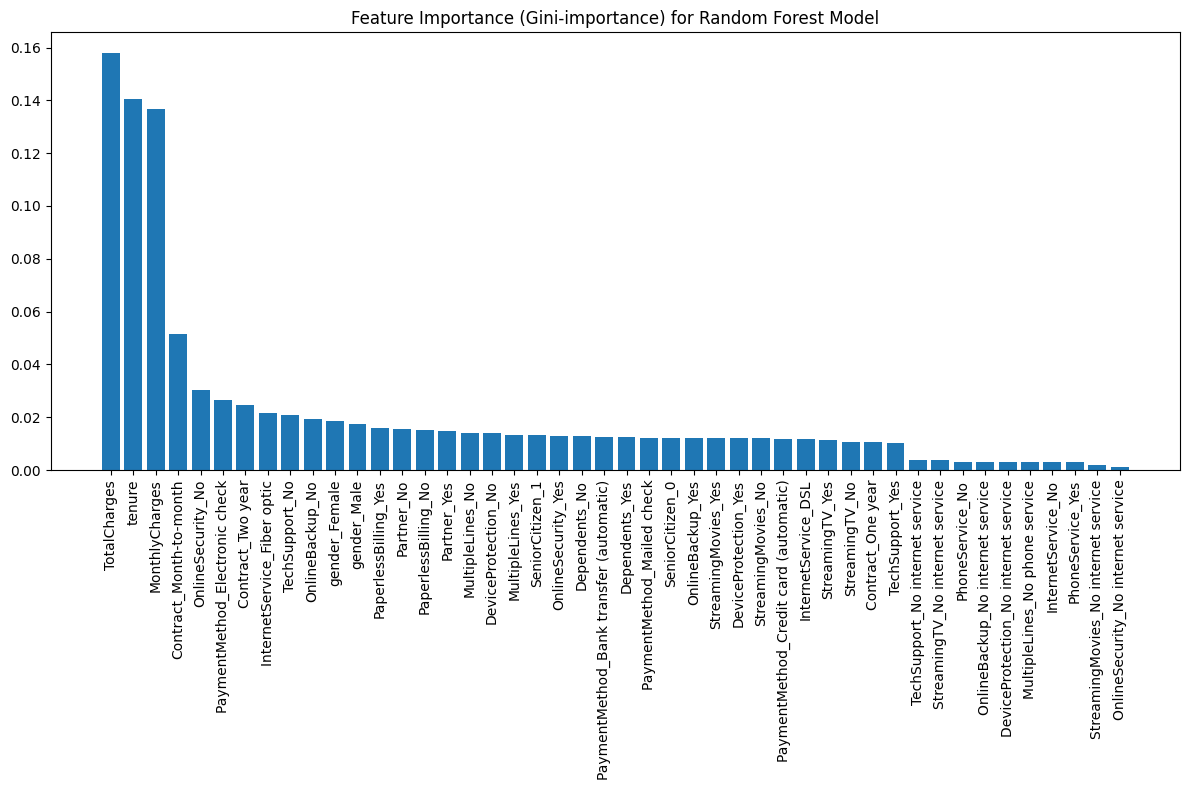

Top 10 most important features for predicting churn:
TotalCharges: 0.1579
tenure: 0.1404
MonthlyCharges: 0.1366
Contract_Month-to-month: 0.0515
OnlineSecurity_No: 0.0304
PaymentMethod_Electronic check: 0.0266
Contract_Two year: 0.0247
InternetService_Fiber optic: 0.0216
TechSupport_No: 0.0209
OnlineBackup_No: 0.0194


In [127]:
# Extract feature importance from trained random forest model
feature_importances = random_forest_pipeline.named_steps['classifier'].feature_importances_

# Get list of all features including encoded categorical features
feature_names = list(preprocessor.named_transformers_['num'].feature_names_in_) + \
                list(random_forest_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out())

# Sort features by their importance
indices = np.argsort(feature_importances)[::-1]

# Display feature importance graph
plt.figure(figsize=(12, 8))
plt.title('Feature Importance (Gini-importance) for Random Forest Model')
plt.bar(range(len(feature_importances)), feature_importances[indices], align='center')
plt.xticks(range(len(feature_importances)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

# Print the top 10 most important features
top_features = [(feature_names[i], feature_importances[i]) for i in indices[:10]]
print("Top 10 most important features for predicting churn:")
for feature, importance in top_features:
    print(f"{feature}: {importance:.4f}")


# How would you use the results of your analysis? Or what are the business insights from your analysis?

1. Identifying customers with a high risk of churn:
- How to use: Using the random forest model, a company can regularly estimate the probability of churn for each customer. Customers for whom the probability of churn is above a certain threshold should become priority targets for retention.
- Business insight: Customers who are on short (monthly) contracts, have high monthly payments and use certain types of services (e.g., "Fiber optic") are more likely to churn. Based on this, the company can target its efforts to reduce churn in the most vulnerable segments.

2. Developing personalized retention strategies:
- How to use: Based on the most important features identified by the model (e.g., Contract, MonthlyCharges, InternetService), personalized offers can be developed for customers. For customers with a high risk of churn, the company can offer:
  - Discounts on monthly payments.
  - Switching to longer-term contracts with bonuses.
  - Free or discounted add-on services (e.g. OnlineSecurity or TechSupport).
- Business Insight: Models show that customers with long-term contracts and additional services are less likely to churn. A strategy of focusing on long-term contracts and providing additional services can help reduce churn.

3. Optimize Offers and Products:
- How to Use: Using the results of customer clustering, you can identify different segments of your customer base and tailor offers to their needs. For example, if one cluster contains customers with high monthly expenses and a tendency to churn, the company can offer them special pricing plans or service packages.
- Business Insight: Customers using certain types of services (e.g. Fiber Optic) show a higher tendency to churn. The company can conduct additional analysis to understand why these customers are unhappy and improve the quality of services or reduce prices.

4. Improve Service Quality:
- How to Use: The model found that the presence of additional services such as OnlineSecurity and TechSupport reduces the likelihood of churn. The company can invest in developing these services and actively promote them to customers to increase overall satisfaction.
- Business insight: Quality of service and provision of additional services are key factors in customer retention. Focusing on improving these services can increase customer loyalty.

5. Monitoring and retraining the model:
- How to use: The company can regularly update the model and data to account for changes in customer behavior and market conditions. Constantly monitoring the model metrics (accuracy, recall, precision) will allow timely detection of a decrease in efficiency and take action.
- Business insight: Since customer behavior changes over time, it is important to have a flexible system that can adapt to new conditions. Regular retraining of the model will keep forecasts and strategies relevant.

6. Reducing marketing costs:
- How to use: Segmenting customers based on churn probability allows the company to focus marketing efforts and resources on target customer groups, which can significantly reduce costs on unnecessary campaigns.
- Business Insight: Investing in retaining customers at high risk of churn is more cost-effective than massive marketing campaigns without understanding target groups.

Overall Findings and Business Insights:
1. Key Drivers of Churn: Contract length, monthly payments, type of internet service, and availability of add-ons are key indicators of churn. A company should pay special attention to customers with short contracts and high monthly payments.
2. Personalization: A personalized approach to customer retention based on data analytics can significantly reduce churn rates and increase customer loyalty.
3. Investing in Additional Services: Additional services such as support and online security increase customer satisfaction and reduce churn, making them an important area to invest in.
4. Adaptive Strategies: Customer behavior is volatile, so regular data analysis and adaptation of retention strategies are necessary.